In [1]:
import torch
import numpy as np 

# 파이토치 에서는 텐서를 사용하여 모델의 입력과 출력, 그리고 모델의 매개변수를 부호화 한다. 

In [2]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)



In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [4]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

In [6]:
print(rand_tensor)
print(ones_tensor)
print(zeros_tensor)

tensor([[0.8634, 0.1134, 0.8058],
        [0.2408, 0.5326, 0.6345]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [12]:
tensor = torch.rand(3,4)

print(tensor.shape)
print(tensor.dtype)
print(tensor.device)

torch.Size([3, 4])
torch.float32
cpu


In [13]:
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [15]:
tensor = torch.ones(4,4)
print(tensor[0])
print(tensor[:, 0])
print("?",tensor[..., -1])
tensor[:,1] = 0
print(tensor)

tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])
? tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [19]:
print(tensor)
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [20]:
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [21]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [34]:
print(tensor, "\n")
tensor.add_(5) # _ 를 붙이면 tensor을 변경 

tensor([[26., 25., 26., 26.],
        [26., 25., 26., 26.],
        [26., 25., 26., 26.],
        [26., 25., 26., 26.]]) 



tensor([[31., 30., 31., 31.],
        [31., 30., 31., 31.],
        [31., 30., 31., 31.],
        [31., 30., 31., 31.]])

In [36]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [37]:
# Dataset, DataLoader

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt 

training_data = datasets.FashionMNIST(
    root = "data", # 데이터가 저장된 경로
    train = True, # 테스트or학습용 데이터셋 여부를 지정 
    download = True, # root에 데이터가 없으면 인터넷에서 다운로드 
    transform = ToTensor() # transform과 target_transform은 특징과 정답 변형을 지정 
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


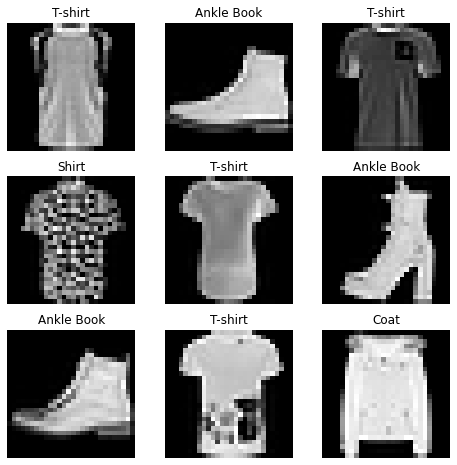

In [42]:
# 데이터셋 시각화하기
# Dataset에 리스트처럼 직접접근 가능, training_data[index].matplotlib을 사용 

labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Book",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols*rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [43]:
import os
import pandas as pd 
from torchvision.io import read_image

# 사용자정의 Dataset 클래스는 반드시 3개의 함수를 구현해야 한다. 
# __init__ , __len__ , __getitem__ 3개이다
# FashionMNIST이미지들이 img_dir디렉토리에 저장, 정답은 annotations_file csv파일에 저장됨 

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
    # __init__함수는 Dataset 객체가 생성될 때 한번만 실행된다. 
    # annotation_file이 포함된 디렉토리와 두가지 변형을 초기화한다. 
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
  
  def __len__(self):
    # __len__ 함수는 데이터셋의 샘플 개수를 반환한다. 
    return len(self.img_labels)

  def __getitem__(self, idx):
    # __getitem__ 함수는 주어진 인덱스 idx에 해당하는 샘플을 데이터셋에서 불러오고 반환한다. 인덱스를 기반으로
    # 디스크에서 이미지의 위치를 식별하고, read_image를 사용하여 이미지를 텐서로 변환한다. 

    # self.img_labels의 csv데이터로부터 해당하는 정답 label을 가져오고, 변형 transform함수 호출한 뒤
    # 텐서 이미지와 라벨을 pytorch 사전형으로 반환 
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform : 
      image = self.transform(image)
    if self.target_transform :
      label = self.target_transform(label)
    return image, label
